# importing the necessary Python libraries and the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('books.csv', error_bad_lines=False)
df=df.drop(['Unnamed: 12'], axis=1)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA


# Data Exploration

In [ ]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


Sorting Books based on rating

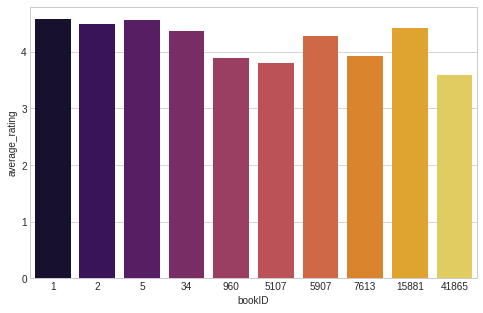

In [ ]:
top_ten=df[df['ratings_count']>1000000]
top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating', ascending=False)

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,5))
sns.barplot(x='bookID', y='average_rating', data=top_ten_rating, palette='inferno')

In [ ]:
#Top 10 Authors

In [ ]:
book_aut=df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


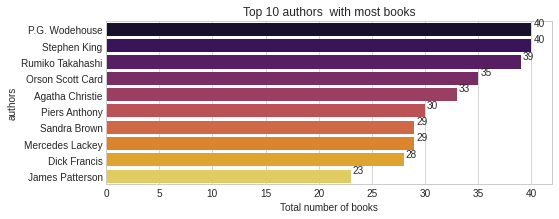

In [ ]:
plt.figure(figsize=(8,3))
ax=sns.barplot(book_aut['title'], book_aut.index, palette='inferno')
ax.set_title("Top 10 authors  with most books")
ax.set_xlabel("Total number of books")

total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

In [ ]:
#Top 10 books

In [ ]:
most_rated=df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


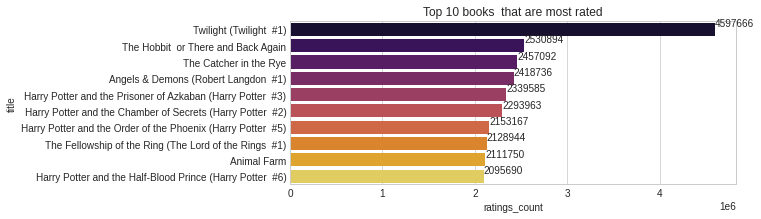

In [ ]:
plt.figure(figsize=(8,3))

ax=sns.barplot(most_rated['ratings_count'], most_rated.index, palette='inferno')
ax.set_title("Top 10 books  that are most rated")


total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

In [ ]:
df=df.sort_values('average_rating').reset_index()
df=df.iloc[4:]
df

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,11103,1302,Juiced Official Strategy Guide,Doug Walsh,0,744005612,9.78E+12,eng,112,0,0,06-01-2005,BradyGames
5,11104,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0,189044717X,9.78E+12,eng,200,0,0,10/13/2000,Grove Press Open City Books
6,11105,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0,1932206108,9.78E+12,eng,228,0,0,01-01-2004,Frederick P. Lenz Foundation for American Budd...
7,11106,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0,1932206086,9.78E+12,eng,304,0,0,01-01-2003,Frederick P. Lenz Foundation for American Budd...
8,11107,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0,8644101277,9.79E+12,srp,222,0,0,01-01-1996,"Izdavačka agencija ""Draganić"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,21,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5,786845031,9.78E+12,eng,24,2,1,02-01-2003,Disney Press
11123,23,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5,089096940X,9.78E+12,eng,314,0,0,05-01-2000,Texas A&M University Press
11124,24,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah
11125,13,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5,563388323,9.78E+12,eng,2,2,0,10-02-1995,BBC Physical Audio


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'average rating')

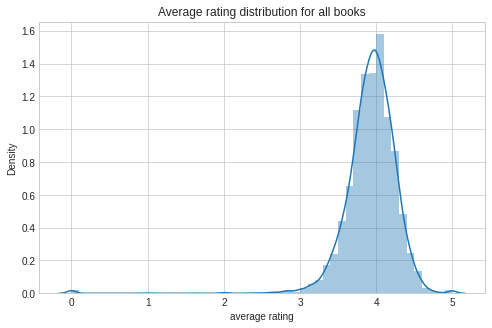

In [ ]:
df.average_rating=df.average_rating.astype(float)
fig, ax= plt.subplots(figsize=[8,5])

sns.distplot(df['average_rating'], ax=ax)
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')

In [ ]:
df.tail(5)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,21,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0,786845031,9.78E+12,eng,24,2,1,02-01-2003,Disney Press
11123,23,39580,The American Campaign: U.S. Presidential Campa...,James E. Campbell,5.0,089096940X,9.78E+12,eng,314,0,0,05-01-2000,Texas A&M University Press
11124,24,39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9.78E+12,eng,240,2,0,10/16/2007,Multnomah
11125,13,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,563388323,9.78E+12,eng,2,2,0,10-02-1995,BBC Physical Audio
11126,22,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0,1930901356,9.78E+12,eng,222,1,0,7/25/2003,Academica Press


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 4 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               11123 non-null  int64  
 1   bookID              11123 non-null  int64  
 2   title               11123 non-null  object 
 3   authors             11123 non-null  object 
 4   average_rating      11123 non-null  float64
 5   isbn                11123 non-null  object 
 6   isbn13              11123 non-null  object 
 7   language_code       11123 non-null  object 
 8   num_pages           11123 non-null  object 
 9   ratings_count       11123 non-null  int64  
 10  text_reviews_count  11123 non-null  int64  
 11  publication_date    11123 non-null  object 
 12  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [ ]:
df=df.sort_values('num_pages', ascending=False).reset_index()
df=df.iloc[4:]
df.head(20)

,level_0,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4,6562,4499,16619,Democracy in America,Alexis de Tocqueville/Isaac Kramnick/Gerald Bevan,4.02,140447601,9.78E+12,eng,992,18925,523,4/24/2003,Penguin Classics
5,10327,837,28389,Marcel Proust: A Life,William C. Carter,4.33,300094000,9.78E+12,eng,992,14,4,02-08-2002,Yale University Press
6,10719,438,19809,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,385313489,9.78E+12,eng,992,9659,467,04-01-1984,Delta
7,10715,437,19808,The Last Lion: Winston Spencer Churchill: Visi...,William Manchester,4.42,316545031,9.78E+12,en-US,992,335,38,5/30/1983,Little Brown & Company
8,7026,4039,19670,Debt of Honor (Jack Ryan #7),Tom Clancy,4.05,425147584,9.78E+12,eng,990,39521,469,08-01-1995,Berkley Books
9,893,10253,34307,Aches & Pains,Maeve Binchy/Wendy Shea,3.53,385335105,9.78E+12,en-US,99,356,30,6/13/2000,Delacorte Press
10,5249,5813,7015,A Midsummer Night's Dream,William Shakespeare/Roma Gill,3.94,198320213,9.78E+12,eng,99,14,3,8/15/2002,Oxford University Press USA
11,10138,1028,31580,In Search of Duende,Federico García Lorca/Norman Thomas di Giovanni,4.30,811213765,9.78E+12,eng,99,616,36,4/17/1998,New Directions
12,10521,632,44921,Explode the Code 1,Nancy Hall,4.37,838814603,9.78E+12,eng,99,89,10,01-01-2001,School Specialty Publishing
13,1751,9425,24978,Inside Job,Connie Willis,3.67,1596060247,9.78E+12,eng,99,1442,180,06-01-2005,Subterranean Press


In [ ]:

df.num_pages=df.num_pages.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 4 to 11122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   level_0             11119 non-null  int64  
 1   index               11119 non-null  int64  
 2   bookID              11119 non-null  int64  
 3   title               11119 non-null  object 
 4   authors             11119 non-null  object 
 5   average_rating      11119 non-null  float64
 6   isbn                11119 non-null  object 
 7   isbn13              11119 non-null  object 
 8   language_code       11119 non-null  object 
 9   num_pages           11119 non-null  float64
 10  ratings_count       11119 non-null  int64  
 11  text_reviews_count  11119 non-null  int64  
 12  publication_date    11119 non-null  object 
 13  publisher           11119 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.2+ MB


# Data Preparation

In [ ]:
df2=df.copy()

In [ ]:
df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1"
df2.loc[(df2['average_rating']>1)&(df2['average_rating']<=2),'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>2)&(df2['average_rating']<=3),'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>3)&(df2['average_rating']<=4),'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>4)&(df2['average_rating']<=5),'rating between']="between 4 and 5"

In [ ]:
df2.sort_values('average_rating')

,level_0,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating between
10787,20,11119,29404,Your Child and Jesus: A Family Activity Book,Rick Osborne/Kevin Miller,0.0,080242855X,9.78E+12,eng,112.0,0,0,9/13/1999,Moody Publishers,between 0 and 1
6600,13,11112,24010,"Laguna I Love You: The Best of ""Our Town""",John Weld/Phil Interlandi,0.0,1564741575,9.78E+12,eng,285.0,0,0,03-01-1996,Fithian Press,between 0 and 1
1160,12,11111,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,916724948,9.78E+12,eng,63.0,0,0,12/31/1997,Arts Publications,between 0 and 1
7625,23,11122,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,0.0,805850848,9.78E+12,eng,241.0,0,0,08-05-2006,Routledge,between 0 and 1
7507,18,11117,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,0.0,71485422,9.78E+12,eng,248.0,0,0,12/30/2011,McGraw-Hill Professional Publishing,between 0 and 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8297,11126,22,38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0,1930901356,9.78E+12,eng,222.0,1,0,7/25/2003,Academica Press,between 4 and 5
7823,11122,21,36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll/Alisa Klayman-Grodsky/Eric ...,5.0,786845031,9.78E+12,eng,24.0,2,1,02-01-2003,Disney Press,between 4 and 5
8802,11112,10,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,533017424,9.78E+12,eng,202.0,4,0,01-01-1975,Vantage Press,between 4 and 5
10526,11110,8,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,744002354,9.78E+12,eng,128.0,2,0,03-06-2003,BradyGames,between 4 and 5


In [ ]:
rating_df=pd.get_dummies(df2['rating between'])
language_df=pd.get_dummies(df2['language_code'])

In [ ]:
language_df

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11120,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
feature=pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)

In [ ]:
feature 

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.02,18925
5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.33,14
6,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,9659
7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,335
8,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.05,39521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.05,1
11119,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.04,7
11120,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.89,2
11121,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.16,68


# Building Book Recommendation System

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()

feature=minmax.fit_transform(feature)

In [ ]:
feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.04000000e-01, 4.11621897e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.66000000e-01, 3.04502328e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 2.10084856e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.78000000e-01, 4.35003326e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.32000000e-01, 1.47901131e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.52000000e-01, 4.65453558e-05]])

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model=neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

model.fit(feature)

dist, idlist=model.kneighbors(feature)

In [ ]:
dist

array([[0.00000000e+00, 5.98129573e-05, 3.70840335e-04, ...,
        1.20539422e-03, 1.24280450e-03, 1.34133275e-03],
       [0.00000000e+00, 0.00000000e+00, 1.08750831e-06, ...,
        2.39251829e-06, 2.39251829e-06, 2.39251829e-06],
       [0.00000000e+00, 2.19676679e-05, 2.80359643e-04, ...,
        1.52164163e-03, 1.53904177e-03, 1.69281544e-03],
       ...,
       [0.00000000e+00, 2.17501663e-07, 4.35003326e-07, ...,
        3.26252494e-06, 5.00253824e-06, 6.96005321e-06],
       [0.00000000e+00, 1.52251164e-06, 5.65504323e-06, ...,
        9.85282532e-05, 1.22453436e-04, 3.72145345e-04],
       [0.00000000e+00, 4.35003326e-07, 2.61001995e-06, ...,
        1.71826314e-05, 2.00101530e-05, 2.19676679e-05]])

In [ ]:
idlist

array([[    0,  2032,  4328, ...,   880,  3242,  7627],
       [ 7814,     1,  3899, ...,   260,  5622,  5634],
       [    2,   301,  4790, ...,   417,  1680,  1235],
       ...,
       [11116,  4786,  1082, ...,  8431,  5162,  1129],
       [11117, 10764, 10834, ...,   153,  9866,   905],
       [11118,  7262,  5816, ...,  5349,  7833,  2058]])

In [ ]:
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

Book_name=bookRecom('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
Book_name

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'The Feelings Book: The Care & Keeping of Your Emotions',
 'The Complete Shorter Fiction of Virginia Woolf',
 'Warrior of the Light',
 'The Known World',
 'Hour Game (Sean King & Michelle Maxwell  #2)',
 "The Art of Innovation: Lessons in Creativity from IDEO  America's Leading Design Firm",
 'Blink: The Power of Thinking Without Thinking',
 'Candide',
 'Beach Blanket Bad Boys']

In [ ]:
#When 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)' is passed to bookRecom() function it recommends 10 other closest books

In [ ]:
Book_name=bookRecom('Democracy in America')
Book_name

['Democracy in America',
 'Lost Illusions (La Comédie Humaine)',
 'Underworld Unleashed',
 'Katherine',
 'La reina de los condenados (Crónicas Vampíricas  #3)',
 'Julius Caesar',
 'A Secret Splendor',
 'Cat Laughing Last (Joe Grey  #7)',
 'Art Objects: Essays on Ecstasy and Effrontery',
 'Philosophy in the Flesh: The Embodied Mind and its Challenge to Western Thought']